In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import oenotebook as oenb
from openeye import oechem
from fragmenter import chemi
import numpy as np
import seaborn as sbn
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
mols = chemi.file_to_oemols('phenyls.smi')

In [4]:
charged_mols = []
for mol in mols:
    charged = chemi.get_charges(mol)
    charged_mols.append(charged)
    chemi.mol_to_image_bond_labels(charged, supress_h=True, fname='mol_images/{}.png'.format(mol.GetTitle()))

In [11]:
fgroups = ['phenoxide', 'dimethylamino', 'methylamino', 'amino', 'ethylamino',
           'propylamino', 'hydroxy', 'methoxy', 'ethoxy','dimethylurea','urea', 'phenylurea','ethylamide', 'amide', 
           'carbamate', 
           'methyl', 'fluoro', 'chloro', 
           'bromo', 'iodo', 
           'benzoicacid', 'ethoxycarbonyl', 'trifluoromethyl', 'cyano', 'trimethylamonium', 'nitro', 
             ]

In [12]:
bond_orders = np.zeros((len(fgroups), len(fgroups)*2+1))


In [13]:
for mol in charged_mols:
    name = mol.GetTitle().split('_')
    if len(name) == 1:
        idx = fgroups.index(name[0])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1 != 0 or m2 !=0):
                print(name)
                bond_orders[idx][0] = bond.GetData('WibergBondOrder')
    if name[0] == 'meta':
        print(name)
        idx_a = fgroups.index(name[-1]) #mapidx of 1
        idx_b = fgroups.index(name[1]) #mapidx of 2
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==2 or m2==2):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b + 1)
        print(idx_b, idx_a + 1)
        bond_orders[idx_a][idx_b+1] = bo_idx_a
        bond_orders[idx_b][idx_a+1] = bo_idx_b
        
    if name[0] == 'para':
        print(name)
        idx_a = fgroups.index(name[-1])
        idx_b = fgroups.index(name[1])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==3 or m2==3):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b+1+len(fgroups))
        print(idx_b, idx_a + 1 + len(fgroups))
        bond_orders[idx_a][idx_b+1+len(fgroups)] = bo_idx_a
        bond_orders[idx_b][idx_a+1+len(fgroups)] = bo_idx_b
        
    

['benzoicacid']
['meta', 'benzoicacid', 'benzoicacid']
0.9551693201065063
0.9554986357688904
20 21
20 21
['para', 'benzoicacid', 'benzoicacid']
0.9509178996086121
0.9507326483726501
20 47
20 47
['meta', 'phenylurea', 'benzoicacid']
0.955651581287384
1.0159571170806885
20 12
11 21
['para', 'phenylurea', 'benzoicacid']
0.9658446907997131
1.0388484001159668
20 38
11 47
['meta', 'trimethylamonium', 'benzoicacid']
0.9383911490440369
0.9070074558258057
20 25
24 21
['para', 'trimethylamonium', 'benzoicacid']
0.9359292387962341
0.9032189846038818
20 51
24 47
['meta', 'dimethylamino', 'benzoicacid']
0.954375684261322
1.0745446681976318
20 2
1 21
['para', 'dimethylamino', 'benzoicacid']
0.9728193879127502
1.108256459236145
20 28
1 47
['meta', 'methylamino', 'benzoicacid']
0.95444256067276
1.0640347003936768
20 3
2 21
['para', 'methylamino', 'benzoicacid']
0.9697189927101135
1.0969516038894653
20 29
2 47
['meta', 'amino', 'benzoicacid']
0.9535766243934631
1.0878715515136719
20 4
3 21
['para', 'am

1.0666823387145996
1 42
15 28
['meta', 'fluoro', 'dimethylamino']
1.0830607414245605
1.0162444114685059
1 17
16 2
['para', 'fluoro', 'dimethylamino']
1.0728133916854858
1 43
16 28
['meta', 'chloro', 'dimethylamino']
1.077781081199646
0.9947154521942139
1 18
17 2
['para', 'chloro', 'dimethylamino']
1.079643726348877
0.9892596006393433
1 44
17 28
['meta', 'bromo', 'dimethylamino']
1.0768392086029053
0.9839863777160645
1 19
18 2
['para', 'bromo', 'dimethylamino']
1.087254285812378
0.9806349873542786
1 45
18 28
['meta', 'iodo', 'dimethylamino']
1.0758780241012573
0.9629412889480591
1 20
19 2
['para', 'iodo', 'dimethylamino']
1.0894367694854736
0.960747480392456
1 46
19 28
['meta', 'ethoxycarbonyl', 'dimethylamino']
0.9271168112754822
1.0747935771942139
1 22
21 2
['para', 'ethoxycarbonyl', 'dimethylamino']
0.9401105642318726
1.0953612327575684
1 48
21 28
['meta', 'trifluoromethyl', 'dimethylamino']
0.9079418778419495
1.0820958614349365
1 23
22 2
['para', 'trifluoromethyl', 'dimethylamino']


25 31
['meta', 'amide', 'ethylamino']
1.0122977495193481
1.068326711654663
4 14
13 5
['para', 'amide', 'ethylamino']
0.9998155236244202
1.063320279121399
4 40
13 31
['meta', 'ethylamide', 'ethylamino']
1.0132412910461426
1.0678350925445557
4 13
12 5
['para', 'ethylamide', 'ethylamino']
1.0033036470413208
1.0491089820861816
4 39
12 31
['meta', 'urea', 'ethylamino']
1.0061562061309814
1.0589890480041504
4 11
10 5
['para', 'urea', 'ethylamino']
0.9989490509033203
1.0619382858276367
4 37
10 31
['meta', 'dimethylurea', 'ethylamino']
1.011508584022522
1.0512847900390625
4 10
9 5
['para', 'dimethylurea', 'ethylamino']
1.0108622312545776
1.0501248836517334
4 36
9 31
['meta', 'carbamate', 'ethylamino']
1.0661414861679077
0.9759148955345154
4 15
14 5
['para', 'carbamate', 'ethylamino']
1.075797438621521
0.9743340015411377
4 41
14 31
['meta', 'phenoxide', 'ethylamino']
1.0048357248306274
1.568708896636963
4 1
0 5
['para', 'phenoxide', 'ethylamino']
0.9852225184440613
1.563537359237671
4 27
0 31
[

['meta', 'ethylamide', 'ethoxy']
1.0189039707183838
1.0338863134384155
8 13
12 9
['para', 'ethylamide', 'ethoxy']
0.9991422295570374
1.0321507453918457
8 39
12 35
['meta', 'urea', 'ethoxy']
1.0177576541900635
1.0337820053100586
8 11
10 9
['para', 'urea', 'ethoxy']
1.0057190656661987
1.0238478183746338
8 37
10 35
['meta', 'dimethylurea', 'ethoxy']
1.0315932035446167
1.0344749689102173
8 10
9 9
['para', 'dimethylurea', 'ethoxy']
1.0101954936981201
1.0285664796829224
8 36
9 35
['meta', 'carbamate', 'ethoxy']
0.9757983088493347
1.0346448421478271
8 15
14 9
['para', 'carbamate', 'ethoxy']
0.9755911231040955
1.0375356674194336
8 41
14 35
['meta', 'phenoxide', 'ethoxy']
1.5787389278411865
0.9812960028648376
8 1
0 9
['para', 'phenoxide', 'ethoxy']
1.5642277002334595
0.9671187400817871
8 27
0 35
['methyl']
['meta', 'methyl', 'methyl']
0.9986008405685425
0.9986359477043152
15 16
15 16
['para', 'methyl', 'methyl']
0.9990460872650146
0.9988582730293274
15 42
15 42
['meta', 'fluoro', 'methyl']
0.99

22 40
13 49
['meta', 'ethylamide', 'trifluoromethyl']
0.907531201839447
1.0238293409347534
22 13
12 23
['para', 'ethylamide', 'trifluoromethyl']
0.9121456742286682
1.0358021259307861
22 39
12 49
['meta', 'urea', 'trifluoromethyl']
0.907802939414978
1.0233319997787476
22 11
10 23
['para', 'urea', 'trifluoromethyl']
0.9120053052902222
1.0373961925506592
22 37
10 49
['meta', 'dimethylurea', 'trifluoromethyl']
0.9078004360198975
1.0339118242263794
22 10
9 23
['para', 'dimethylurea', 'trifluoromethyl']
0.9123649001121521
1.0556137561798096
22 36
9 49
['meta', 'carbamate', 'trifluoromethyl']
0.9079670310020447
0.9819375276565552
22 15
14 23
['para', 'carbamate', 'trifluoromethyl']
0.9085203409194946
0.9819681644439697
22 41
14 49
['meta', 'phenoxide', 'trifluoromethyl']
0.9063793420791626
1.5849456787109375
22 1
0 23
['para', 'phenoxide', 'trifluoromethyl']
0.9423384666442871
1.6243484020233154
22 27
0 49
['cyano']
['meta', 'cyano']
1.0008121728897095
1.0012050867080688
23 24
23 24
['para', 

In [8]:
fgroups = ['phenoxide', 'dimethylamino', 'methylamino', 'amino', 'ethylamino',
           'propylamino', 'hydroxy', 'methoxy', 'ethoxy','dimethylurea','urea', 'phenylurea','ethylamide', 'amide', 
           'carbamate', 
           'methyl', 'fluoro', 'chloro', 
           'bromo', 'iodo', 
           'benzoicacid', 'ethoxycarbonyl', 'trifluoromethyl', 'cyano', 'trimethylamonium', 'nitro', 
             ]
fgroups = ['-[O-]', '-N(Me)2', '-NMe', '-NH2', '-NEt', '-NHPro', '-OH', '-OMe', 'OEt', '-urea(Et)',
          '-urea', '-urea(Me)', '-NC(=O)Et', '-NC(=O)Me', '-OC(=O)NH2', '-Me', '-F', '-Cl', '-Br', '-I', '-COOH', 
           '-COOEt', 
          '-CF3', '-CN', '-N(Me)3', '-NO2']

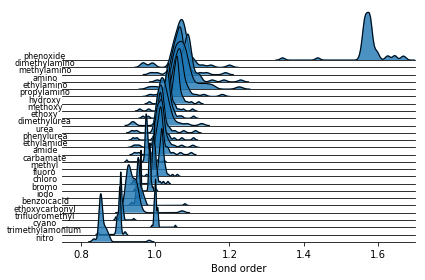

In [19]:
fig, axes = plt.subplots(len(bond_orders), 1)
for i, bo in enumerate(bond_orders):
    ax = plt.subplot(len(bond_orders), 1, i+1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.patch.set_facecolor('none')
    sbn.kdeplot(bo, shade=True, alpha=0.8)
    sbn.kdeplot(bo, shade=False, color='black', lw=1.0)
    #sbn.distplot(bo, hist=False, kde=False, rug=True, color='steelblue')
    plt.xlim(0.75, 1.7)
    plt.yticks([])
    ax.yaxis.set_label_coords(-0.05, 0)
    plt.ylabel(fgroups[i], rotation=0, size=8)
    if i == len(bond_orders)-1:
        plt.xlabel('Bond order')
    else:
        plt.xticks([])
        
overlap=1.0
h_pad = 5 + (- 5*(1 + overlap))
fig.tight_layout(h_pad=h_pad)
plt.savefig('chem_env_2.pdf')

In [22]:
bond_orders[3]

array([1.08302748, 1.02808893, 1.08585882, 1.08562267, 1.08769441,
       1.08406508, 1.08577025, 1.09420693, 1.09369016, 1.09118843,
       1.08624327, 1.08464944, 1.08491027, 1.0839138 , 1.08303881,
       1.08967543, 1.08303487, 1.0997864 , 1.09273314, 1.09140098,
       1.09066033, 1.08787155, 1.08839142, 1.09494925, 1.09301615,
       1.18560135, 1.09975791, 1.00563371, 1.06160831, 1.06734931,
       1.06844294, 1.06682312, 1.06700981, 1.07326734, 1.0719161 ,
       1.07388592, 1.07477391, 1.07356262, 1.07338977, 1.07353842,
       1.07509625, 1.09414113, 1.0842458 , 1.09009016, 1.09454119,
       1.1031332 , 1.1050173 , 1.1207149 , 1.11516285, 1.1192981 ,
       1.11599553, 1.23063934, 1.15373504])

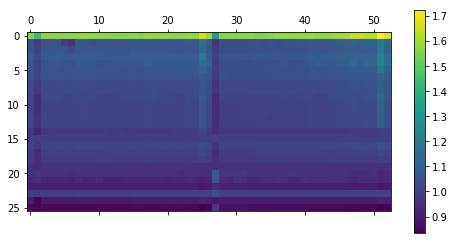

In [23]:
plt.matshow(bond_orders);
plt.colorbar();

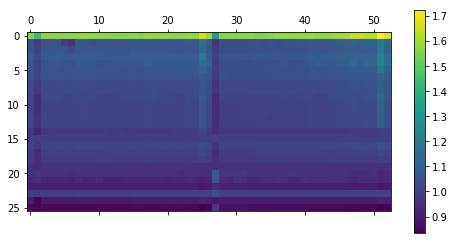

In [24]:
plt.matshow(bond_orders);
plt.colorbar();

In [25]:
np.save('chem_env_bond_orders', bond_orders)

In [27]:
mols = chemi.file_to_oemols('pyridine_ortho.smi')
charged_mols = []
for mol in mols:
    charged = chemi.get_charges(mol)
    charged_mols.append(charged)
    chemi.mol_to_image_bond_labels(charged, supress_h=True, fname='mol_images/{}_ortho_pyridine.png'.format(mol.GetTitle()))

In [28]:
for mol in charged_mols:
    name = mol.GetTitle().split('_')
    if len(name) == 1:
        idx = fgroups.index(name[0])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1 != 0 or m2 !=0):
                print(name)
                bond_orders[idx][0] = bond.GetData('WibergBondOrder')
    if name[0] == 'meta':
        print(name)
        idx_a = fgroups.index(name[-1]) #mapidx of 1
        idx_b = fgroups.index(name[1]) #mapidx of 2
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==2 or m2==2):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b + 1)
        print(idx_b, idx_a + 1)
        bond_orders[idx_a][idx_b+1] = bo_idx_a
        bond_orders[idx_b][idx_a+1] = bo_idx_b
        
    if name[0] == 'para':
        print(name)
        idx_a = fgroups.index(name[-1])
        idx_b = fgroups.index(name[1])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==3 or m2==3):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b+1+len(fgroups))
        print(idx_b, idx_a + 1 + len(fgroups))
        bond_orders[idx_a][idx_b+1+len(fgroups)] = bo_idx_a
        bond_orders[idx_b][idx_a+1+len(fgroups)] = bo_idx_b
        
    

['benzoicacid']
['meta', 'benzoicacid', 'benzoicacid']
0.9467568397521973
0.926463782787323
20 21
20 21
['para', 'benzoicacid', 'benzoicacid']
0.9537327289581299
0.9236022233963013
20 47
20 47
['meta', 'phenylurea', 'benzoicacid']
1.037497878074646
0.9275559186935425
20 12
11 21
['para', 'phenylurea', 'benzoicacid']
1.0439797639846802
0.9363765716552734
20 38
11 47
['meta', 'trimethylamonium', 'benzoicacid']
0.9074180126190186
0.9104339480400085
20 25
24 21
['para', 'trimethylamonium', 'benzoicacid']
0.9142463207244873
0.9099501371383667
20 51
24 47
['meta', 'dimethylamino', 'benzoicacid']
1.1042253971099854
0.9282823204994202
20 2
1 21
['para', 'dimethylamino', 'benzoicacid']
1.1170382499694824
0.943028450012207
20 28
1 47
['meta', 'methylamino', 'benzoicacid']
1.0943409204483032
0.9269643425941467
20 3
2 21
['para', 'methylamino', 'benzoicacid']
1.1078542470932007
0.940587043762207
20 29
2 47
['meta', 'amino', 'benzoicacid']
1.1208069324493408
0.926873505115509
20 4
3 21
['para', 'am

['meta', 'nitro', 'dimethylamino']
0.8443323969841003
1.1238032579421997
1 26
25 2
['para', 'nitro', 'dimethylamino']
0.8841022253036499
1.1696064472198486
1 52
25 28
['meta', 'amide', 'dimethylamino']
1.0279808044433594
1.0936506986618042
1 14
13 2
['para', 'amide', 'dimethylamino']
1.0016542673110962
1.0829946994781494
1 40
13 28
['meta', 'ethylamide', 'dimethylamino']
1.0291411876678467
1.0929453372955322
1 13
12 2
['para', 'ethylamide', 'dimethylamino']
1.0021209716796875
1.0816199779510498
1 39
12 28
['meta', 'urea', 'dimethylamino']
1.0313286781311035
1.0835899114608765
1 11
10 2
['para', 'urea', 'dimethylamino']
1.0019760131835938
1.077658772468567
1 37
10 28
['meta', 'dimethylurea', 'dimethylamino']
1.0438964366912842
1.088579535484314
1 10
9 2
['para', 'dimethylurea', 'dimethylamino']
1.003008246421814
1.0830203294754028
1 36
9 28
['meta', 'carbamate', 'dimethylamino']
0.9752508401870728
1.0979418754577637
1 15
14 2
['para', 'carbamate', 'dimethylamino']
0.9844401478767395
1.1

5 18
17 6
['para', 'chloro', 'propylamino']
0.9965075850486755
1.0807170867919922
5 44
17 32
['meta', 'bromo', 'propylamino']
0.9888247847557068
1.0820926427841187
5 19
18 6
['para', 'bromo', 'propylamino']
0.9835509657859802
1.0888389348983765
5 45
18 32
['meta', 'iodo', 'propylamino']
0.9623595476150513
1.0826243162155151
5 20
19 6
['para', 'iodo', 'propylamino']
0.9578423500061035
1.0958747863769531
5 46
19 32
['meta', 'ethoxycarbonyl', 'propylamino']
0.9239707589149475
1.1147295236587524
5 22
21 6
['para', 'ethoxycarbonyl', 'propylamino']
0.9383883476257324
1.1083130836486816
5 48
21 32
['meta', 'trifluoromethyl', 'propylamino']
0.9038701057434082
1.0930370092391968
5 23
22 6
['para', 'trifluoromethyl', 'propylamino']
0.9159231185913086
1.115559458732605
5 49
22 32
['meta', 'cyano', 'propylamino']
0.9970065951347351
1.0868635177612305
5 24
23 6
['para', 'cyano', 'propylamino']
1.0119343996047974
1.1067612171173096
5 50
23 32
['meta', 'nitro', 'propylamino']
0.8446944952011108
1.101

17 39
12 44
['meta', 'urea', 'chloro']
1.0400192737579346
0.9945107698440552
17 11
10 18
['para', 'urea', 'chloro']
1.0278319120407104
0.99236661195755
17 37
10 44
['meta', 'dimethylurea', 'chloro']
1.0592564344406128
0.9956036806106567
17 10
9 18
['para', 'dimethylurea', 'chloro']
1.0328863859176636
0.9916685223579407
17 36
9 44
['meta', 'carbamate', 'chloro']
0.9838981628417969
0.9982572197914124
17 15
14 18
['para', 'carbamate', 'chloro']
0.9889991879463196
0.9987500905990601
17 41
14 44
['meta', 'phenoxide', 'chloro']
1.6037077903747559
0.9372059106826782
17 1
0 18
['para', 'phenoxide', 'chloro']
1.597851276397705
0.9367271065711975
17 27
0 44
['bromo']
['meta', 'bromo', 'bromo']
0.9905626177787781
0.9769962430000305
18 19
18 19
['para', 'bromo', 'bromo']
0.989474892616272
0.9799085259437561
18 45
18 45
['meta', 'iodo', 'bromo']
0.9597219824790955
0.9777321815490723
18 20
19 19
['para', 'iodo', 'bromo']
0.9580126404762268
0.9799863696098328
18 46
19 45
['meta', 'ethoxycarbonyl', 'b

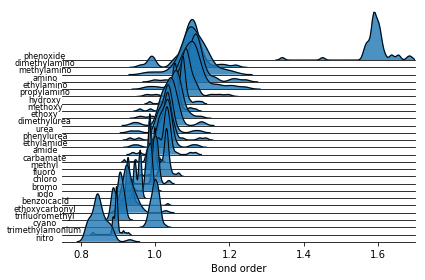

In [30]:
fig, axes = plt.subplots(len(bond_orders), 1)
for i, bo in enumerate(bond_orders):
    ax = plt.subplot(len(bond_orders), 1, i+1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.patch.set_facecolor('none')
    sbn.kdeplot(bo, shade=True, alpha=0.8)
    sbn.kdeplot(bo, shade=False, color='black', lw=1.0)
    #sbn.distplot(bo, hist=False, kde=False, rug=True, color='steelblue')
    plt.xlim(0.75, 1.7)
    plt.yticks([])
    ax.yaxis.set_label_coords(-0.05, 0)
    plt.ylabel(fgroups[i], rotation=0, size=8)
    if i == len(bond_orders)-1:
        plt.xlabel('Bond order')
    else:
        plt.xticks([])
        
overlap=1.0
h_pad = 5 + (- 5*(1 + overlap))
fig.tight_layout(h_pad=h_pad)
plt.savefig('chem_env_pyridine_ortho_2.pdf')

In [31]:
np.save('chem_env_bond_orders_pyridine_ortho', bond_orders)

In [32]:
mols = chemi.file_to_oemols('pyridine_meta.smi')
charged_mols = []
for mol in mols:
    charged = chemi.get_charges(mol)
    charged_mols.append(charged)
    chemi.mol_to_image_bond_labels(charged, supress_h=True, fname='mol_images/{}_meta_pyridine.png'.format(mol.GetTitle()))

In [33]:
for mol in charged_mols:
    name = mol.GetTitle().split('_')
    if len(name) == 1:
        idx = fgroups.index(name[0])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1 != 0 or m2 !=0):
                print(name)
                bond_orders[idx][0] = bond.GetData('WibergBondOrder')
    if name[0] == 'meta':
        print(name)
        idx_a = fgroups.index(name[-1]) #mapidx of 1
        idx_b = fgroups.index(name[1]) #mapidx of 2
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==2 or m2==2):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b + 1)
        print(idx_b, idx_a + 1)
        bond_orders[idx_a][idx_b+1] = bo_idx_a
        bond_orders[idx_b][idx_a+1] = bo_idx_b
        
    if name[0] == 'para':
        print(name)
        idx_a = fgroups.index(name[-1])
        idx_b = fgroups.index(name[1])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==3 or m2==3):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b+1+len(fgroups))
        print(idx_b, idx_a + 1 + len(fgroups))
        bond_orders[idx_a][idx_b+1+len(fgroups)] = bo_idx_a
        bond_orders[idx_b][idx_a+1+len(fgroups)] = bo_idx_b
        
    

['benzoicacid']
['meta', 'benzoicacid', 'benzoicacid']
0.9568176865577698
0.9563169479370117
20 21
20 21
['para', 'benzoicacid', 'benzoicacid']
0.9537327289581299
0.9236022233963013
20 47
20 47
['meta', 'phenylurea', 'benzoicacid']
0.95850670337677
1.0270451307296753
20 12
11 21
['para', 'phenylurea', 'benzoicacid']
0.9694052338600159
1.055596113204956
20 38
11 47
['meta', 'trimethylamonium', 'benzoicacid']
0.9380797743797302
0.9150640368461609
20 25
24 21
['para', 'trimethylamonium', 'benzoicacid']
0.9361125230789185
0.8962713479995728
20 51
24 47
['meta', 'dimethylamino', 'benzoicacid']
0.9570332765579224
1.084513783454895
20 2
1 21
['para', 'dimethylamino', 'benzoicacid']
0.9776704907417297
1.1440346240997314
20 28
1 47
['meta', 'methylamino', 'benzoicacid']
0.9563806056976318
1.0751068592071533
20 3
2 21
['para', 'methylamino', 'benzoicacid']
0.9783071875572205
1.1647460460662842
20 29
2 47
['meta', 'amino', 'benzoicacid']
0.9565101265907288
1.0948189496994019
20 4
3 21
['para', 'a

1 34
7 28
['meta', 'ethoxy', 'dimethylamino']
1.0897433757781982
1.046164631843567
1 9
8 2
['para', 'ethoxy', 'dimethylamino']
1.061313509941101
1.0366427898406982
1 35
8 28
['meta', 'methyl', 'dimethylamino']
0.9993498921394348
1.0769842863082886
1 16
15 2
['para', 'methyl', 'dimethylamino']
1.0770915746688843
0.984913170337677
1 42
15 28
['meta', 'fluoro', 'dimethylamino']
1.0946036577224731
1.0219813585281372
1 17
16 2
['para', 'fluoro', 'dimethylamino']
1.0820896625518799
1 43
16 28
['meta', 'chloro', 'dimethylamino']
1.0886588096618652
0.9999772906303406
1 18
17 2
['para', 'chloro', 'dimethylamino']
1.0897618532180786
0.9866499304771423
1 44
17 28
['meta', 'bromo', 'dimethylamino']
1.0865495204925537
0.986777663230896
1 19
18 2
['para', 'bromo', 'dimethylamino']
1.0967011451721191
0.9714023470878601
1 45
18 28
['meta', 'iodo', 'dimethylamino']
1.0865576267242432
0.9602447748184204
1 20
19 2
['para', 'iodo', 'dimethylamino']
1.0993531942367554
0.9449706673622131
1 46
19 28
['meta',

3 36
9 30
['meta', 'carbamate', 'amino']
1.0973925590515137
0.983514130115509
3 15
14 4
['para', 'carbamate', 'amino']
1.0973588228225708
0.973009467124939
3 41
14 30
['meta', 'phenoxide', 'amino']
1.0357564687728882
1.5817797183990479
3 1
0 4
['para', 'phenoxide', 'amino']
1.0082379579544067
1.5886483192443848
3 27
0 30
['ethylamino']
['meta', 'ethylamino']
1.0850642919540405
1.0847660303115845
4 5
4 5
['para', 'ethylamino']
1.0495566129684448
1.0562341213226318
4 31
4 31
['meta', 'propylamino', 'ethylamino']
1.0812835693359375
1.0677729845046997
4 6
5 5
['para', 'propylamino', 'ethylamino']
1.0486572980880737
1.0589348077774048
4 32
5 31
['meta', 'hydroxy', 'ethylamino']
1.092618465423584
1.0659737586975098
4 7
6 5
['para', 'hydroxy', 'ethylamino']
1.053836703300476
1.0568339824676514
4 33
6 31
['meta', 'methoxy', 'ethylamino']
1.1019376516342163
1.0423296689987183
4 8
7 5
['para', 'methoxy', 'ethylamino']
1.0512220859527588
1.0329471826553345
4 34
7 31
['meta', 'ethoxy', 'ethylamino

1.032583236694336
1.0447988510131836
7 10
9 8
['para', 'dimethylurea', 'methoxy']
1.0323823690414429
1.0173245668411255
7 36
9 34
['meta', 'carbamate', 'methoxy']
0.9851774573326111
1.0431631803512573
7 15
14 8
['para', 'carbamate', 'methoxy']
1.0420197248458862
0.9798705577850342
7 41
14 34
['meta', 'phenoxide', 'methoxy']
1.5942533016204834
0.9905595779418945
7 1
0 8
['para', 'phenoxide', 'methoxy']
0.9624319076538086
1.5834131240844727
7 27
0 34
['ethoxy']
['meta', 'ethoxy', 'ethoxy']
1.0410728454589844
1.0370858907699585
8 9
8 9
['para', 'ethoxy', 'ethoxy']
1.0385533571243286
1.03657066822052
8 35
8 35
['meta', 'methyl', 'ethoxy']
0.9994815587997437
1.0437673330307007
8 16
15 9
['para', 'methyl', 'ethoxy']
1.043175220489502
0.9839577078819275
8 42
15 35
['meta', 'fluoro', 'ethoxy']
1.0553009510040283
1.025588870048523
8 17
16 9
['para', 'fluoro', 'ethoxy']
1.0472784042358398
1.0219284296035767
8 43
16 35
['meta', 'chloro', 'ethoxy']
1.0513181686401367
1.004931926727295
8 18
17 9
['

21 48
['meta', 'trifluoromethyl', 'ethoxycarbonyl']
0.9261404871940613
0.9086951017379761
21 23
22 22
['para', 'trifluoromethyl', 'ethoxycarbonyl']
0.9275395274162292
0.8845432996749878
21 49
22 48
['meta', 'cyano', 'ethoxycarbonyl']
1.005855679512024
0.9255929589271545
21 24
23 22
['para', 'cyano', 'ethoxycarbonyl']
0.9873500466346741
0.9487343430519104
21 50
23 48
['meta', 'nitro', 'ethoxycarbonyl']
0.9237906336784363
0.8608169555664062
21 26
25 22
['para', 'nitro', 'ethoxycarbonyl']
0.9435913562774658
0.8159847855567932
21 52
25 48
['meta', 'amide', 'ethoxycarbonyl']
0.9285566806793213
1.0240368843078613
21 14
13 22
['para', 'amide', 'ethoxycarbonyl']
0.9609099626541138
1.0470412969589233
21 40
13 48
['meta', 'ethylamide', 'ethoxycarbonyl']
0.9295990467071533
1.0265429019927979
21 13
12 22
['para', 'ethylamide', 'ethoxycarbonyl']
0.9531258344650269
1.0351859331130981
21 39
12 48
['meta', 'urea', 'ethoxycarbonyl']
0.9274712800979614
1.022839069366455
21 11
10 22
['para', 'urea', 'eth

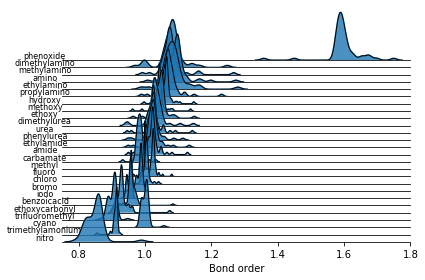

In [38]:
fig, axes = plt.subplots(len(bond_orders), 1)
for i, bo in enumerate(bond_orders):
    ax = plt.subplot(len(bond_orders), 1, i+1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.patch.set_facecolor('none')
    sbn.kdeplot(bo, shade=True, alpha=0.8)
    sbn.kdeplot(bo, shade=False, color='black', lw=1.0)
    #sbn.distplot(bo, hist=False, kde=False, rug=True, color='steelblue')
    plt.xlim(0.75, 1.8)
    plt.yticks([])
    ax.yaxis.set_label_coords(-0.05, 0)
    plt.ylabel(fgroups[i], rotation=0, size=8)
    if i == len(bond_orders)-1:
        plt.xlabel('Bond order')
    else:
        plt.xticks([])
        
overlap=1.0
h_pad = 5 + (- 5*(1 + overlap))
fig.tight_layout(h_pad=h_pad)
plt.savefig('chem_env_pyridine_meta_2.pdf')

In [39]:
np.save('chem_env_bond_orders_meta_pyridine', bond_orders)

In [40]:
mols = chemi.file_to_oemols('pyridine_para.smi')
charged_mols = []
for mol in mols:
    charged = chemi.get_charges(mol)
    charged_mols.append(charged)
    chemi.mol_to_image_bond_labels(charged, supress_h=True, fname='mol_images/{}_para_pyridine.png'.format(mol.GetTitle()))

In [41]:
for mol in charged_mols:
    name = mol.GetTitle().split('_')
    if len(name) == 1:
        idx = fgroups.index(name[0])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1 != 0 or m2 !=0):
                print(name)
                bond_orders[idx][0] = bond.GetData('WibergBondOrder')
    if name[0] == 'meta':
        print(name)
        idx_a = fgroups.index(name[-1]) #mapidx of 1
        idx_b = fgroups.index(name[1]) #mapidx of 2
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==2 or m2==2):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b + 1)
        print(idx_b, idx_a + 1)
        bond_orders[idx_a][idx_b+1] = bo_idx_a
        bond_orders[idx_b][idx_a+1] = bo_idx_b
        
    if name[0] == 'para':
        print(name)
        idx_a = fgroups.index(name[-1])
        idx_b = fgroups.index(name[1])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==3 or m2==3):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b+1+len(fgroups))
        print(idx_b, idx_a + 1 + len(fgroups))
        bond_orders[idx_a][idx_b+1+len(fgroups)] = bo_idx_a
        bond_orders[idx_b][idx_a+1+len(fgroups)] = bo_idx_b
        
    

['benzoicacid']
['meta', 'benzoicacid', 'benzoicacid']
0.9467568397521973
0.926463782787323
20 21
20 21
['para', 'benzoicacid', 'benzoicacid']
0.9509178996086121
0.9507326483726501
20 47
20 47
['meta', 'phenylurea', 'benzoicacid']
0.9453040361404419
1.0439846515655518
20 12
11 21
['para', 'phenylurea', 'benzoicacid']
0.9658446907997131
1.0388484001159668
20 38
11 47
['meta', 'trimethylamonium', 'benzoicacid']
0.9307712316513062
0.8977105021476746
20 25
24 21
['para', 'trimethylamonium', 'benzoicacid']
0.9359292387962341
0.9032189846038818
20 51
24 47
['meta', 'dimethylamino', 'benzoicacid']
0.946864664554596
1.1063445806503296
20 2
1 21
['para', 'dimethylamino', 'benzoicacid']
0.9728193879127502
1.108256459236145
20 28
1 47
['meta', 'methylamino', 'benzoicacid']
0.9457135796546936
1.1168683767318726
20 3
2 21
['para', 'methylamino', 'benzoicacid']
0.9697189927101135
1.0969516038894653
20 29
2 47
['meta', 'amino', 'benzoicacid']
0.9462082982063293
1.1118515729904175
20 4
3 21
['para', '

1.0953235626220703
3 5
4 4
['para', 'ethylamino', 'amino']
1.066823124885559
1.0516327619552612
3 31
4 30
['meta', 'propylamino', 'amino']
1.1159687042236328
1.0785914659500122
3 6
5 4
['para', 'propylamino', 'amino']
1.0670098066329956
1.0466129779815674
3 32
5 30
['meta', 'hydroxy', 'amino']
1.1264760494232178
1.0744491815567017
3 7
6 4
['para', 'hydroxy', 'amino']
1.0732673406600952
1.0463742017745972
3 33
6 30
['meta', 'methoxy', 'amino']
1.1209172010421753
1.0505461692810059
3 8
7 4
['para', 'methoxy', 'amino']
1.071916103363037
1.0235953330993652
3 34
7 30
['meta', 'ethoxy', 'amino']
1.1201893091201782
1.0599205493927002
3 9
8 4
['para', 'ethoxy', 'amino']
1.0738859176635742
1.0241676568984985
3 35
8 30
['meta', 'methyl', 'amino']
1.1104589700698853
0.9843603372573853
3 16
15 4
['para', 'methyl', 'amino']
0.9986771941184998
1.0842458009719849
3 42
15 30
['meta', 'fluoro', 'amino']
1.131014347076416
1.0291637182235718
3 17
16 4
['para', 'fluoro', 'amino']
1.0900901556015015
1.0084

10 35
['meta', 'dimethylurea', 'ethoxy']
1.0464686155319214
1.023392915725708
8 10
9 9
['para', 'dimethylurea', 'ethoxy']
1.0101954936981201
1.0285664796829224
8 36
9 35
['meta', 'carbamate', 'ethoxy']
1.0550135374069214
0.9819856286048889
8 15
14 9
['para', 'carbamate', 'ethoxy']
0.9755911231040955
1.0375356674194336
8 41
14 35
['meta', 'phenoxide', 'ethoxy']
0.9897883534431458
1.6069353818893433
8 1
0 9
['para', 'phenoxide', 'ethoxy']
1.5642277002334595
0.9671187400817871
8 27
0 35
['methyl']
['meta', 'methyl', 'methyl']
0.999442458152771
0.9854481816291809
15 16
15 16
['para', 'methyl', 'methyl']
0.9990460872650146
0.9988582730293274
15 42
15 42
['meta', 'fluoro', 'methyl']
0.9994493722915649
1.0277057886123657
15 17
16 16
['para', 'fluoro', 'methyl']
0.9986787438392639
1.0148817300796509
15 43
16 42
['meta', 'chloro', 'methyl']
0.9992629289627075
0.9950852990150452
15 18
17 16
['para', 'chloro', 'methyl']
0.9989908337593079
0.9957184195518494
15 44
17 42
['meta', 'bromo', 'methyl']

13 15
14 14
['para', 'carbamate', 'amide']
1.0170353651046753
0.9760056734085083
13 41
14 40
['meta', 'phenoxide', 'amide']
0.9642198085784912
1.5923842191696167
13 1
0 14
['para', 'phenoxide', 'amide']
0.9448692202568054
1.5791659355163574
13 27
0 40
['ethylamide']
['meta', 'ethylamide', 'ethylamide']
1.0375183820724487
1.0214842557907104
12 13
12 13
['para', 'ethylamide', 'ethylamide']
1.0075486898422241
1.0077600479125977
12 39
12 39
['meta', 'urea', 'ethylamide']
1.0331928730010986
1.0331085920333862
12 11
10 13
['para', 'urea', 'ethylamide']
1.0065938234329224
1.0067917108535767
12 37
10 39
['meta', 'dimethylurea', 'ethylamide']
1.0320236682891846
1.0337660312652588
12 10
9 13
['para', 'dimethylurea', 'ethylamide']
1.005165696144104
1.012201189994812
12 36
9 39
['meta', 'carbamate', 'ethylamide']
1.0352319478988647
0.981181263923645
12 15
14 13
['para', 'carbamate', 'ethylamide']
1.0182803869247437
0.9755725860595703
12 41
14 39
['meta', 'phenoxide', 'ethylamide']
0.96340048313140

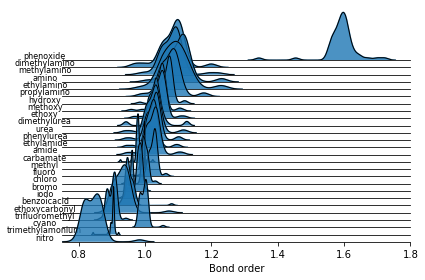

In [44]:
fig, axes = plt.subplots(len(bond_orders), 1)
for i, bo in enumerate(bond_orders):
    ax = plt.subplot(len(bond_orders), 1, i+1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.patch.set_facecolor('none')
    sbn.kdeplot(bo, shade=True, alpha=0.8)
    sbn.kdeplot(bo, shade=False, color='black', lw=1.0)
    #sbn.distplot(bo, hist=False, kde=False, rug=True, color='steelblue')
    plt.xlim(0.75, 1.8)
    plt.yticks([])
    ax.yaxis.set_label_coords(-0.05, 0)
    plt.ylabel(fgroups[i], rotation=0, size=8)
    if i == len(bond_orders)-1:
        plt.xlabel('Bond order')
    else:
        plt.xticks([])
        
overlap=1.0
h_pad = 5 + (- 5*(1 + overlap))
fig.tight_layout(h_pad=h_pad)
plt.savefig('chem_env_pyridine_para_2.pdf')

In [28]:
np.save('chem_env_bond_orders_para_pyridine', bond_orders)

In [29]:
mols = chemi.file_to_oemols('pyridine_ortho_2.smi')
charged_mols = []
for mol in mols:
    charged = chemi.get_charges(mol)
    charged_mols.append(charged)
    chemi.mol_to_image_bond_labels(charged, supress_h=True, fname='{}_ortho_pyridine_2.png'.format(mol.GetTitle()))

In [30]:
for mol in charged_mols:
    name = mol.GetTitle().split('_')
    if len(name) == 1:
        idx = fgroups.index(name[0])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1 != 0 or m2 !=0):
                print(name)
                bond_orders[idx][0] = bond.GetData('WibergBondOrder')
    if name[0] == 'meta':
        print(name)
        idx_a = fgroups.index(name[-1]) #mapidx of 1
        idx_b = fgroups.index(name[1]) #mapidx of 2
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==2 or m2==2):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b + 1)
        print(idx_b, idx_a + 1)
        bond_orders[idx_a][idx_b+1] = bo_idx_a
        bond_orders[idx_b][idx_a+1] = bo_idx_b
        
    if name[0] == 'para':
        print(name)
        idx_a = fgroups.index(name[-1])
        idx_b = fgroups.index(name[1])
        for bond in mol.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if not bond.IsInRing() and (m1==1 or m2==1):
                bo_idx_a = bond.GetData('WibergBondOrder')
                print(bo_idx_a)
            if not bond.IsInRing() and (m1==3 or m2==3):
                bo_idx_b = bond.GetData('WibergBondOrder')
                print(bo_idx_b)
        print(idx_a, idx_b+1+len(fgroups))
        print(idx_b, idx_a + 1 + len(fgroups))
        bond_orders[idx_a][idx_b+1+len(fgroups)] = bo_idx_a
        bond_orders[idx_b][idx_a+1+len(fgroups)] = bo_idx_b
        
    

['benzoicacid']
['meta', 'benzoicacid', 'benzoicacid']
0.9467568397521973
0.926463782787323
19 20
19 20
['para', 'benzoicacid', 'benzoicacid']
0.9537327289581299
0.9236022233963013
19 45
19 45
['meta', 'phenylurea', 'benzoicacid']
1.037497878074646
0.9275559186935425
19 11
10 20
['para', 'phenylurea', 'benzoicacid']
1.0439797639846802
0.9363765716552734
19 36
10 45
['meta', 'trimethylamonium', 'benzoicacid']
0.9074180126190186
0.9104339480400085
19 24
23 20
['para', 'trimethylamonium', 'benzoicacid']
0.9142463207244873
0.9099501371383667
19 49
23 45
['meta', 'dimethylamino', 'benzoicacid']
1.1042253971099854
0.9282823204994202
19 1
0 20
['para', 'dimethylamino', 'benzoicacid']
1.1170382499694824
0.943028450012207
19 26
0 45
['meta', 'methylamino', 'benzoicacid']
1.0943409204483032
0.9269643425941467
19 2
1 20
['para', 'methylamino', 'benzoicacid']
1.1078542470932007
0.940587043762207
19 27
1 45
['meta', 'amino', 'benzoicacid']
1.1208069324493408
0.926873505115509
19 3
2 20
['para', 'am

1 30
4 27
['meta', 'hydroxy', 'methylamino']
1.0723762512207031
1.1243457794189453
1 6
5 2
['para', 'hydroxy', 'methylamino']
1.047499656677246
1.0802795886993408
1 31
5 27
['meta', 'methoxy', 'methylamino']
1.049689531326294
1.1106407642364502
1 7
6 2
['para', 'methoxy', 'methylamino']
1.0245819091796875
1.0773251056671143
1 32
6 27
['meta', 'ethoxy', 'methylamino']
1.0494896173477173
1.1102328300476074
1 8
7 2
['para', 'ethoxy', 'methylamino']
1.031328558921814
1.0801361799240112
1 33
7 27
['meta', 'methyl', 'methylamino']
0.9989480972290039
1.1055928468704224
1 15
14 2
['para', 'methyl', 'methylamino']
0.9989877343177795
1.1092627048492432
1 40
14 27
['meta', 'fluoro', 'methylamino']
1.0283540487289429
1.1255501508712769
1 16
15 2
['para', 'fluoro', 'methylamino']
1.0093894004821777
1.1214580535888672
1 41
15 27
['meta', 'chloro', 'methylamino']
1.0038492679595947
1.1219655275344849
1 17
16 2
['para', 'chloro', 'methylamino']
0.9940018057823181
1.1284507513046265
1 42
16 27
['meta',

1.0119942426681519
1.0698727369308472
6 48
22 32
['meta', 'nitro', 'methoxy']
0.8454984426498413
1.0647307634353638
6 25
24 7
['para', 'nitro', 'methoxy']
0.8738364577293396
1.0908973217010498
6 50
24 32
['meta', 'amide', 'methoxy']
1.0339258909225464
1.049515962600708
6 13
12 7
['para', 'amide', 'methoxy']
1.0112930536270142
1.0438792705535889
6 38
12 32
['meta', 'ethylamide', 'methoxy']
1.035766363143921
1.0482659339904785
6 12
11 7
['para', 'ethylamide', 'methoxy']
1.0119192600250244
1.043237328529358
6 37
11 32
['meta', 'urea', 'methoxy']
1.0369861125946045
1.0490331649780273
6 10
9 7
['para', 'urea', 'methoxy']
1.010949969291687
1.0427501201629639
6 35
9 32
['meta', 'dimethylurea', 'methoxy']
1.0601086616516113
1.054344654083252
6 9
8 7
['para', 'dimethylurea', 'methoxy']
1.0257954597473145
1.0397673845291138
6 34
8 32
['meta', 'carbamate', 'methoxy']
0.9809256792068481
1.0547034740447998
6 14
13 7
['para', 'carbamate', 'methoxy']
0.9875361323356628
1.0586062669754028
6 39
13 32
[

12 19
['para', 'amide', 'iodo']
1.031184434890747
0.9450646638870239
18 38
12 44
['meta', 'ethylamide', 'iodo']
1.036380648612976
0.9462436437606812
18 12
11 19
['para', 'ethylamide', 'iodo']
1.0328470468521118
0.9451968669891357
18 37
11 44
['meta', 'urea', 'iodo']
1.0390441417694092
0.9462295770645142
18 10
9 19
['para', 'urea', 'iodo']
1.0341804027557373
0.9452049136161804
18 35
9 44
['meta', 'dimethylurea', 'iodo']
1.045103907585144
0.9458497166633606
18 9
8 19
['para', 'dimethylurea', 'iodo']
1.049365758895874
0.9449234008789062
18 34
8 44
['meta', 'carbamate', 'iodo']
0.9836875200271606
0.945130467414856
18 14
13 19
['para', 'carbamate', 'iodo']
0.9883183240890503
0.9460947513580322
18 39
13 44
['ethoxycarbonyl']
['meta', 'ethoxycarbonyl']
0.9237632751464844
0.9035211205482483
20 21
20 21
['para', 'ethoxycarbonyl']
0.9414892196655273
0.9156285524368286
20 46
20 46
['meta', 'trifluoromethyl', 'ethoxycarbonyl']
0.9030030965805054
0.9161013960838318
20 22
21 21
['para', 'trifluorome

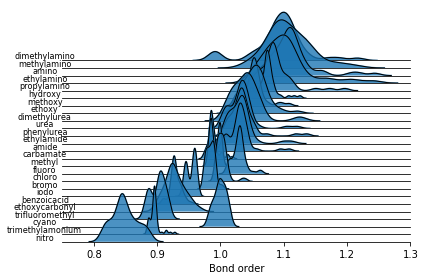

In [31]:
fig, axes = plt.subplots(len(bond_orders), 1)
for i, bo in enumerate(bond_orders):
    ax = plt.subplot(len(bond_orders), 1, i+1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.patch.set_facecolor('none')
    sbn.kdeplot(bo, shade=True, alpha=0.8)
    sbn.kdeplot(bo, shade=False, color='black', lw=1.0)
    #sbn.distplot(bo, hist=False, kde=False, rug=True, color='steelblue')
    plt.xlim(0.75, 1.3)
    plt.yticks([])
    ax.yaxis.set_label_coords(-0.05, 0)
    plt.ylabel(fgroups[i], rotation=0, size=8)
    if i == len(bond_orders)-1:
        plt.xlabel('Bond order')
    else:
        plt.xticks([])
        
overlap=1.0
h_pad = 5 + (- 5*(1 + overlap))
fig.tight_layout(h_pad=h_pad)
plt.savefig('chem_env_pyridine_ortho_2.pdf')

In [32]:
np.save('chem_env_bond_orders_ortho_2_pyridine', bond_orders)

In [3]:
# load all molecules
all_mols = chemi.file_to_oemols('phenyls.smi')
all_mols.extend(chemi.file_to_oemols('pyridine_ortho.smi'))
#mols.extend(chemi.file_to_oemols('pyridine_ortho_2.smi'))
all_mols.extend(chemi.file_to_oemols('pyridine_meta.smi'))
all_mols.extend(chemi.file_to_oemols('pyridine_para.smi'))

In [6]:
fgroups = ['benzoicacid', 'phenylurea', 'trimethylamonium', 'dimethylamino', 'methylamino', 'amino', 'ethylamino',
          'propylamino', 'hydroxy', 'methoxy', 'ethoxy', 'methyl', 'fluoro', 'chloro', 'bromo', 'iodo', 
           'ethoxycarbonyl', 'trifluoromethyl', 'cyano', 'nitro', 'amide', 'ethylamide', 'urea', 'dimethylurea',
          'carbamate', 'phenoxide']
def group_by_fgroup_and_wbo(fgroup, molecules):
    mols = []
    for mol in molecules:
        name = mol.GetTitle().split('_')
        if fgroup in name:
            mols.append(mol)
            
    # remove duplicates
    smiles = []
    deduplicated_mols = []
    for mol in mols:
        sm = oechem.OEMolToSmiles(mol)
        if sm not in smiles:
            smiles.append(sm)
            deduplicated_mols.append(mol)
    # sort by wbo
    wbo_dict = {}
    for mol in deduplicated_mols:
        name = mol.GetTitle().split('_')
        charged = chemi.get_charges(mol)
        if fgroup == name[-1]:
            map_idx = [1]
        elif fgroup == name[1]:
            map_idx = [2, 3]
        for bond in charged.GetBonds():
            m1 = bond.GetBgn().GetMapIdx()
            m2 = bond.GetEnd().GetMapIdx()
            if (m1 in map_idx or m2 in map_idx) and not bond.IsInRing():
                wbo = bond.GetData('WibergBondOrder')
                if wbo not in wbo_dict:
                    wbo_dict[wbo] = []
                wbo_dict[wbo].append(charged)
    return wbo_dict
        
def prep_mols_for_vis(wbo_dict, fgroup):
    # first sort wbo
    wbo_keys = sorted(list(wbo_dict.keys()))
    molecules = []
    bond_map_idx = [(4,5)]*len(wbo_keys)
    for bo in wbo_keys:
        drop = False
        mol = oechem.OEMol(wbo_dict[bo][0])
        name = mol.GetTitle().split('_')
        if fgroup == name[-1]:
            map_idx = [1]
        elif fgroup == name[1]:
            map_idx = [2, 3]
        for bond in mol.GetBonds():
            a1 = bond.GetBgn()
            a2 = bond.GetEnd()
            m1 = a1.GetMapIdx()
            m2 = a2.GetMapIdx()
            if name[-1] == fgroup:
                to_check_ortho = [1, 4, 5]
            elif name[1] == fgroup:
                to_check_ortho = [2, 3, 4, 5]
            if (m1 in to_check_ortho or m2 in to_check_ortho) and bond.IsInRing():
                if a1.GetAtomicNum() == 7 or a2.GetAtomicNum() == 7:
                    # The N is ortho to the bond. drop our from list
                    drop = True
            if (m1 in map_idx or m2 in map_idx) and not bond.IsInRing():
                bond.GetBgn().SetMapIdx(4)
                bond.GetEnd().SetMapIdx(5)
            else:
                # Remove wbo
                to_delete = bond.GetData('WibergBondOrder')
                tag = oechem.OEGetTag('WibergBondOrder')
                bond.DeleteData(tag)
        if not drop:
            molecules.append(mol)
    return molecules, bond_map_idx

            

In [11]:
for fgroup in fgroups[-1:]:
    print(fgroup)
    wbo_dict = group_by_fgroup_and_wbo(fgroup, all_mols)
    mols, bond_maps = prep_mols_for_vis(wbo_dict, fgroup=fgroup)
    chemi.to_pdf(molecules=mols, bond_map_idx=bond_maps, bo=True, oname='{}.pdf'.format(fgroup))

phenoxide


In [10]:
fgroups[-1:]

['phenoxide']